In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from IPython.display import display

%matplotlib inline

sns.set(font="simhei")

特情数据

In [20]:
train_s = pd.read_csv('input/train/special-case.csv')
train_s.head()

,Airport,CTime,STime,ETime,Content
0,csx,2015-04-30 19:52:45Z,2015-05-01 12:00:00Z,2015-05-01 16:00:00Z,长沙机场航班延误黄色预警提示：预计明日（5月1日）12:00-16:00长沙黄花机场受雷雨天...
1,wuh,2015-05-01 08:13:39Z,2015-05-01 08:00:00Z,2015-05-01 12:00:00Z,目前，8时-12时雷雨，期间进出港航班可能受到影响。
2,khn,2015-05-01 08:14:18Z,2015-05-01 14:00:00Z,2015-05-01 17:00:00Z,预计，14时-17时小雷雨，期间进出港航班可能受到影响。
3,swa,2015-05-01 08:24:28Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。
4,zha,2015-05-01 08:24:56Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。


In [23]:
train_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 5 columns):
Airport    15877 non-null object
CTime      15869 non-null object
STime      15869 non-null object
ETime      15862 non-null object
Content    15868 non-null object
dtypes: object(5)
memory usage: 620.4+ KB


In [26]:
train_s['CTime'] = pd.to_datetime(train_s['CTime'])
train_s['STime'] = pd.to_datetime(train_s['STime'])
train_s['ETime'] = pd.to_datetime(train_s['ETime'])
train_s.head()

,Airport,CTime,STime,ETime,Content
0,csx,2015-04-30 19:52:45,2015-05-01 12:00:00,2015-05-01 16:00:00,长沙机场航班延误黄色预警提示：预计明日（5月1日）12:00-16:00长沙黄花机场受雷雨天...
1,wuh,2015-05-01 08:13:39,2015-05-01 08:00:00,2015-05-01 12:00:00,目前，8时-12时雷雨，期间进出港航班可能受到影响。
2,khn,2015-05-01 08:14:18,2015-05-01 14:00:00,2015-05-01 17:00:00,预计，14时-17时小雷雨，期间进出港航班可能受到影响。
3,swa,2015-05-01 08:24:28,2015-05-01 13:00:00,2015-05-01 17:00:00,预计，13时-17时雷雨，期间进出港航班可能受到影响。
4,zha,2015-05-01 08:24:56,2015-05-01 13:00:00,2015-05-01 17:00:00,预计，13时-17时雷雨，期间进出港航班可能受到影响。


In [2]:
train_1705 = pd.read_csv('input/train/fights-2017-05.csv')

display(train_1705.head())
train_1705.info()

,Departure,Destination,FLTNo,PDepartureTime,PArrivalTime,ADepartureTime,AArrivalTime,Id,IsCancel
0,PVG,CKG,9C8867,1495602600,1495613700,1.495605e+09,1.495613e+09,2798.0,正常
1,CAN,TAO,HU7275,1493947200,1493958600,1.493948e+09,1.493958e+09,1479.0,正常
2,KWE,KMG,GJ8661,1494775200,1494779400,1.494783e+09,1.494787e+09,2957.0,正常
3,WNZ,CSX,CZ6956,1495185600,1495191300,1.495188e+09,1.495193e+09,419.0,正常
4,ENH,WUH,CZ3841,1494460800,1494465000,1.494471e+09,1.494474e+09,1421.0,正常


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326557 entries, 0 to 326556
Data columns (total 9 columns):
Departure         326557 non-null object
Destination       326557 non-null object
FLTNo             326557 non-null object
PDepartureTime    326557 non-null int64
PArrivalTime      326557 non-null int64
ADepartureTime    317996 non-null float64
AArrivalTime      317875 non-null float64
Id                322561 non-null float64
IsCancel          326557 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 22.4+ MB


延误时间分布

In [4]:
train_1705['Delay'] = (train_1705['ADepartureTime'] - train_1705['PDepartureTime']) / 60

train_1705['DelayRange'] = pd.cut(train_1705['Delay'], [0, 10, 20, 30, 60, 120, 180, 300, 720, np.inf])

train_1705.head()

,Departure,Destination,FLTNo,PDepartureTime,PArrivalTime,ADepartureTime,AArrivalTime,Id,IsCancel,Delay,DelayRange
0,PVG,CKG,9C8867,1495602600,1495613700,1.495605e+09,1.495613e+09,2798.0,正常,34.0,"(30.0, 60.0]"
1,CAN,TAO,HU7275,1493947200,1493958600,1.493948e+09,1.493958e+09,1479.0,正常,18.0,"(10.0, 20.0]"
2,KWE,KMG,GJ8661,1494775200,1494779400,1.494783e+09,1.494787e+09,2957.0,正常,134.0,"(120.0, 180.0]"
3,WNZ,CSX,CZ6956,1495185600,1495191300,1.495188e+09,1.495193e+09,419.0,正常,41.0,"(30.0, 60.0]"
4,ENH,WUH,CZ3841,1494460800,1494465000,1.494471e+09,1.494474e+09,1421.0,正常,167.0,"(120.0, 180.0]"


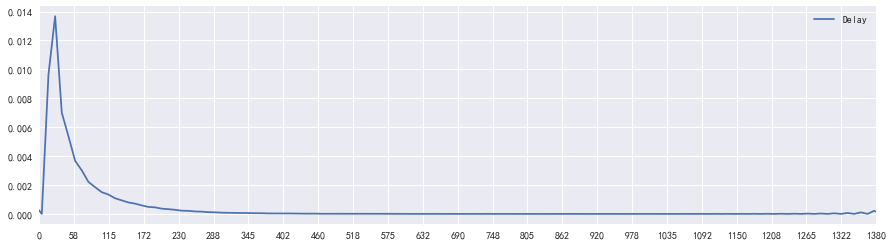

In [7]:
plt.figure(figsize=(15, 4))
g = sns.kdeplot(train_1705.loc[((~train_1705['Delay'].isnull()) & (train_1705['Delay'] > 0)), 'Delay'])
g.set_xlim(0, train_1705['Delay'].max())
g.xaxis.set_major_locator(ticker.LinearLocator(25))

In [8]:
train_1705['DelayRange'].value_counts()

(0.0, 10.0]       69045
(10.0, 20.0]      64463
(30.0, 60.0]      49311
(20.0, 30.0]      36480
(60.0, 120.0]     34479
(120.0, 180.0]    13042
(180.0, 300.0]     8172
(300.0, 720.0]     2414
(720.0, inf]         57
Name: DelayRange, dtype: int64

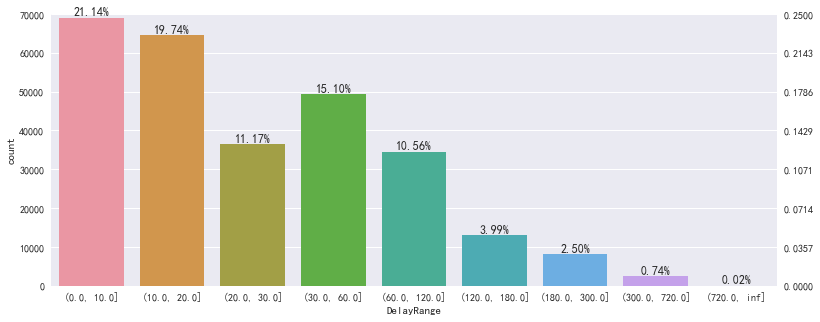

In [9]:


plt.figure(figsize=(13, 5))
g = sns.countplot(train_1705['DelayRange'])


ncount = len(train_1705)
for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text

g2 = g.twinx()
g2.grid(None)

# Use a LinearLocator to ensure the correct number of ticks
g.set_ylim(0, 70000)
g.yaxis.set_major_locator(ticker.LinearLocator(8))

g2.set_ylim(0, 0.25)
g2.yaxis.set_major_locator(ticker.LinearLocator(8))

机场延误情况

In [19]:
train_1705.loc[(train_1705['Departure'] =='SHA') & (train_1705['Id'] < 30)]

,Departure,Destination,FLTNo,PDepartureTime,PArrivalTime,ADepartureTime,AArrivalTime,Id,IsCancel,Delay,DelayRange
3113,SHA,KMG,MU5804,1495453500,1495465200,1.495454e+09,1.495465e+09,8.0,正常,13.0,"(10.0, 20.0]"
16875,SHA,PEK,FM9107,1495632000,1495640400,1.495634e+09,1.495641e+09,2.0,正常,39.0,"(30.0, 60.0]"
20176,SHA,TSN,FM9264,1495432800,1495441500,1.495439e+09,1.495445e+09,2.0,正常,97.0,"(60.0, 120.0]"
24154,SHA,SWA,FM9297,1495160700,1495169100,1.495164e+09,1.495170e+09,2.0,正常,53.0,"(30.0, 60.0]"
33457,SHA,FOC,MF8542,1495177500,1495182600,1.495179e+09,1.495184e+09,13.0,正常,32.0,"(30.0, 60.0]"
34958,SHA,XMN,FM9263,1495411500,1495417800,1.495417e+09,1.495422e+09,2.0,正常,93.0,"(60.0, 120.0]"
41860,SHA,CKG,CA4544,1494906000,1494916500,1.494907e+09,1.494916e+09,11.0,正常,23.0,"(20.0, 30.0]"
88071,SHA,LJG,MU5868,1494061500,1494075000,1.494062e+09,1.494075e+09,8.0,正常,9.0,"(0.0, 10.0]"
101310,SHA,HAK,FM9251,1495764000,1495774200,1.495765e+09,1.495774e+09,2.0,正常,10.0,"(0.0, 10.0]"
115226,SHA,TEN,MU5882,1494891900,1494901800,1.494893e+09,1.494901e+09,8.0,正常,22.0,"(20.0, 30.0]"
